In [2]:
import numpy as np
import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import csv

data = pd.read_csv("LiquorSalesSamplev2.csv")
data.head(10)
print("Number of lines present: ", len(data))
# data.info()

Number of lines present:  1004380


In [4]:
data[['Month', 'Day', 'Year']] = data['Date'].str.split('/', expand = True)
data

,Reference,Invoice/Item Number,Invoice,Item Number,Date,Store Number,City,Zip Code,County,Category Name,Label,Item Description,Pack,Bottle Volume (ml),Bottles Sold,Sale (Dollars),Volume Sold (Liters),Month,Day,Year
0,167646,3.06831E+11,306831300,20,7/30/12,3869,CORALVILLE,52241,Johnson,VODKA 80 PROOF,Vodka,Burnett's Vodka 80 Prf,12,750,1,6.82,0.75,7,30,12
1,262366,3.06831E+11,306831300,15,7/30/12,3869,CORALVILLE,52241,Johnson,VODKA FLAVORED,Vodka,Uv Cake Vodka,12,750,1,9.74,0.75,7,30,12
2,794258,3.06831E+11,306831300,9,7/30/12,3869,CORALVILLE,52241,Johnson,VODKA FLAVORED,Vodka,Firefly Sweet Tea Vodka,12,750,1,14.00,0.75,7,30,12
3,19508,4295S05259700026,4295S0525,26,4/26/12,4295,DES MOINES,50317,Polk,CANADIAN WHISKIES,Whiskey,Crown Royal Canadian Whisky,24,375,4,44.16,1.50,4,26,12
4,64511,4295S05259700008,4295S0525,8,4/26/12,4295,DES MOINES,50317,Polk,100 PROOF VODKA,Vodka,Mccormick Vodka,12,750,12,59.52,9.00,4,26,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004375,937731,S29361400016,S29361400,16,11/30/15,3806,WEST DES MOINES,50266,Polk,IMPORTED VODKA,Vodka,Stolichnaya Russian Vodka 80 Prf,12,750,12,215.88,9.00,11,30,15
1004376,39010,S444400048,S44440004,48,1/7/15,3573,OTTUMWA,52501,Wapello,CANADIAN WHISKIES,Whiskey,Canadian Mist Whisky,12,1000,3,30.21,3.00,1,7,15
1004377,512891,S444400040,S44440004,40,1/7/15,3573,OTTUMWA,52501,Wapello,IMPORTED DRY GINS,Gin,Bombay Sapphire Gin,12,1000,3,79.26,3.00,1,7,15
1004378,77593,S444400054,S44440005,54,1/7/15,3573,OTTUMWA,52501,Wapello,PEPPERMINT SCHNAPPS,Schnapps,Paramount Peppermint Schnapps,24,375,3,10.26,1.12,1,7,15


In [5]:
data['Month'].unique()

array(['7', '4', '1', '2', '3', '5', '6', '8', '10', '9', '11', '12'],
      dtype=object)

In [6]:


# PREVIOUSLY tried version 
# def timeofyear_maximum(filename, Time, Sales):
#     data = pd.read_csv(filename)
#     data[['Month', 'Day', 'Year']] = data['Date'].str.split('/', expand = True)
#     data = data.groupby(data[Time])
#     max_of_col = data[Sales].max()
#     return max_of_col
# def timeofyear_maximum(filename, Time, Sales):
#     data = pd.read_csv(filename)
#     data[['Month', 'Day', 'Year']] = data['Date'].str.split('/', expand = True)
#     data = data.groupby(data[Time])
    
#     max_of_col = data[Sales].max().sort_values(['Month'], ascending=True)
#     return max_of_col

# Q1: What time of year are liquor sales the highest? - Most popular months oct-jan
# make graph

#  New sorted version 
def timeofyear_maximum(filename, Time, Sales): 
    data = pd.read_csv(filename) 
    data[['Month', 'Day', 'Year']] = data['Date'].str.split('/', expand=True) 
    data['Month'] = pd.to_numeric(data['Month']) 
    data = data.sort_values(by='Month') 
    data = data.groupby(Time) 
    max_of_col = data[Sales].max() 
    return max_of_col 


print(timeofyear_maximum('LiquorSalesSamplev2.csv', 'Month', 'Sale (Dollars)'))
print(timeofyear_maximum('LiquorSalesSamplev2.csv', 'Year', 'Sale (Dollars)'))

Month
1     40470.0
2     31980.0
3     33488.4
4     31344.0
5     29686.8
6     28782.0
7     22680.0
8     31867.2
9     32610.0
10    53676.0
11    48929.4
12    41940.0
Name: Sale (Dollars), dtype: float64
Year
12    48929.4
13    33488.4
14    53676.0
15    26820.0
Name: Sale (Dollars), dtype: float64


In [7]:
# Q2: Are there hotspots where liquor sales are higher than average? mention highest and lowest
# make graph of this for both county and city

def county_maximum(filename, County, Sales):
    data = pd.read_csv(filename)
    data[['Month', 'Day', 'Year']] = data['Date'].str.split('/', expand = True)
    data = data.groupby(data[County])
    max_of_col = data[Sales].max() 
    return max_of_col

def county_mean(filename, County, Sales):
    data = pd.read_csv(filename)
    data[['Month', 'Day', 'Year']] = data['Date'].str.split('/', expand = True)
    data = data.groupby(data[County])
    mean_of_col = data[Sales].mean() 
    return mean_of_col.sort_values()
    # max_avg, min_avg = mean_of_col.max(), mean_of_col.min()
    # return max_avg, min_avg

def state_mean(filename, Sales):
    data = pd.read_csv(filename)
    mean_of_col = data[Sales].mean() 
    return mean_of_col


# print(county_maximum('LiquorSales.csv', 'County', 'Sale (Dollars)'))
# print(county_maximum('LiquorSales.csv', 'City', 'Sale (Dollars)'))
print("County mean: ", county_mean('LiquorSalesSamplev2.csv', 'County', 'Sale (Dollars)'))
print("City mean: ", county_mean('LiquorSalesSamplev2.csv', 'City', 'Sale (Dollars)'))
print("State mean: ", state_mean('LiquorSalesSamplev2.csv', 'Sale (Dollars)'))

## Reminder: Taylor county has lowest average liqour sales overall, Dallas county has highest average liquor sales overall.
## Reminder: West Branch city has lowest average liqour sales overall, Le Claire city has highest average liquor sales overall.


County mean:  County
Taylor       40.357958
Louisa       47.144544
Monona       50.026196
Wayne        50.633617
Adams        51.635893
               ...    
Johnson     150.787287
Polk        152.515701
Carroll     153.997895
Delaware    175.939774
Dallas      274.207168
Name: Sale (Dollars), Length: 99, dtype: float64
City mean:  City
BLUE GRASS          26.112072
WEST BRANCH         27.459805
Des Moines          27.527188
WILTON              27.873566
DURANT              28.782953
                      ...    
FAYETTE            210.297616
MT VERNON          216.254204
ORANGE CITY        237.907403
WINDSOR HEIGHTS    275.191568
Cumming            584.100000
Name: Sale (Dollars), Length: 393, dtype: float64
State mean:  124.97764840996436


In [102]:
# Q3: Is there a preferred liquor type by county or city
# make a graph of all liquors
# if there's time, do of random sampling county by top liquors
# graph what the preferred liquor are for top county/ buyers (question 2 results)
# 3a - filler for paper to write about potential advertising based on these results

# FOR PART 3 - only write about top in the state since we can't print out all results. 
# Tried in .py it gives same print results. Tried as output file, but same results. Need solution for final report.

def preferred_type(filename, Liquor):
    data = pd.read_csv(filename)
    data = data.groupby(data[Liquor])['Reference'].count()
    return data.sort_values()


def preferred_type_byLoc(filename, Liquor, Location):
    data = pd.read_csv(filename)
    data = data.groupby([Location, Liquor])['Reference'].count()
    return data

    
print(preferred_type('LiquorSalesSamplev2.csv', 'Label'))
print(preferred_type_byLoc('LiquorSalesSamplev2.csv', 'Label', 'County'))
print(preferred_type_byLoc('LiquorSalesSamplev2.csv', 'Label', 'City'))

Label
High Proof Beer             2
Novelty                  3928
Scotch                   8698
Other Grain Alcohol      9035
Cream Based Liqueur     23980
Pre-Mixed Cocktails     29766
Gin                     40627
Tequila                 43743
Brandy                  53845
Bourbon                 56701
Schnapps                59490
Liqueur                101368
Rum                    125322
Whiskey                192711
Vodka                  255164
Name: Reference, dtype: int64
County  Label              
Adair   Bourbon                157
        Brandy                  81
        Cream Based Liqueur     42
        Gin                     54
        Liqueur                174
                              ... 
Wright  Schnapps               196
        Scotch                   1
        Tequila                108
        Vodka                  648
        Whiskey                654
Name: Reference, Length: 1373, dtype: int64
City     Label              
ACKLEY   Bourbon            

In [79]:
# Q4: Time of year when liquor sales go up
# use plot for question 1 and 4
# surprised that summer is lower than winter
# plot on a yearly basis (page filler)
# drill down to days that are causing spikes (use def timeofyear_maximum) -- is there a specific date that causes the spike?
# split by year and see if there is something interesting

# conclusion - October is a peak month as shown by the mean

# monthly_sales = timeofyear_maximum('LiquorSalesSamplev2.csv', 'Month', 'Sale (Dollars)')

# monthly_sales.plot();

# use 2 digit year as a string
# if we need more content, then use this by county
def yearly_county_maximum(filename, County, Sales, year):
    data = pd.read_csv(filename)
    data[['Month', 'Day', 'Year']] = data['Date'].str.split('/', expand = True)
    data = data[data['Year'] == year]
    data = data.groupby(data[County])
    max_of_col = data[Sales].max() 
    return max_of_col

# def county_mean(filename, County, Sales):
#     data = pd.read_csv(filename)
#     data[['Month', 'Day', 'Year']] = data['Date'].str.split('/', expand = True)
#     data = data.groupby(data[County])
#     mean_of_col = data[Sales].mean() 
#     return mean_of_col.sort_values()

# def state_mean(filename, Sales):
#     data = pd.read_csv(filename)
#     mean_of_col = data[Sales].mean() 
#     return mean_of_col

def timeofyear_maximum(filename, Time, Sales, year): 
    data = pd.read_csv(filename) 
    data[['Month', 'Day', 'Year']] = data['Date'].str.split('/', expand=True) 
    data['Month'] = pd.to_numeric(data['Month']) 
    data = data[data['Year'] == year]
    data = data.sort_values(by='Month') 
    data = data.groupby(data[Time]) 
    max_of_col = data[Sales].max() 
    print(max_of_col)
    return max_of_col 

def timeofyear_mean(filename, Time, Sales, year): 
    data = pd.read_csv(filename) 
    data[['Month', 'Day', 'Year']] = data['Date'].str.split('/', expand=True) 
    data['Month'] = pd.to_numeric(data['Month']) 
    data = data[data['Year'] == year]
    data = data.sort_values(by='Month') 
    data = data.groupby(data[Time]) 
    mean_of_col = data[Sales].mean() 
    print(mean_of_col)
    return mean_of_col 

def timeofyear_mean_day(filename, Sales, year, month): 
    data = pd.read_csv(filename) 
    data[['Month', 'Day', 'Year']] = data['Date'].str.split('/', expand=True) 
    data['Day'] = pd.to_numeric(data['Day']) 
    data = data[data['Year'] == year]
    data = data[data['Month'] == month]
    data = data.sort_values(by='Day') 
    data = data.groupby(data['Day']) 
    mean_of_col_day = data[Sales].mean() 
    print(mean_of_col_day)
    return mean_of_col_day

# print(county_maximum('LiquorSalesSamplev2.csv', 'County', 'Sale (Dollars)', '12'))

# sales_2012.plot();

# county_max_2012 = county_maximum('LiquorSalesSamplev2.csv','County', 'Sale (Dollars)', 2012)
# county_max_2012.plot();

# monthly_sales.plot();
# # print(county_maximum('LiquorSales.csv', 'City', 'Sale (Dollars)'))
# print("County mean: ", county_mean('LiquorSalesSamplev2.csv', 'County', 'Sale (Dollars)'))
# print("City mean: ", county_mean('LiquorSalesSamplev2.csv', 'City', 'Sale (Dollars)'))
# print("State mean: ", state_mean('LiquorSalesSamplev2.csv', 'Sale (Dollars)'))

Month
1     12840.00
2     25584.00
3     23478.00
4     20515.20
5     11250.00
6     28782.00
7     22680.00
8     26988.00
9     32610.00
10    32117.76
11    48929.40
12    41940.00
Name: Sale (Dollars), dtype: float64


<AxesSubplot: xlabel='Month'>

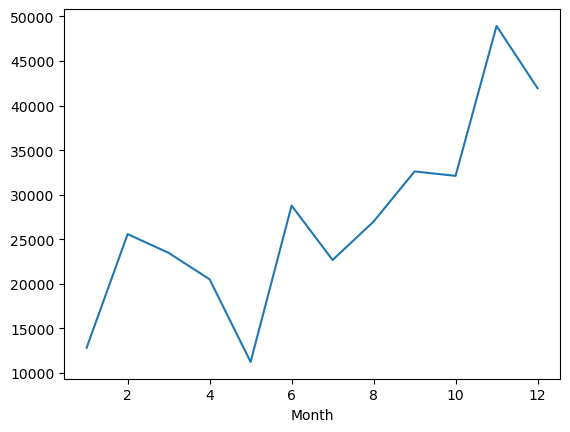

In [80]:
timeofyear_maximum('LiquorSalesSamplev2.csv', 'Month', 'Sale (Dollars)', '12').plot()

Month
1     106.758222
2     119.519684
3     111.341250
4     118.268274
5     113.136112
6     127.238342
7     112.073590
8     112.468567
9     120.231077
10    167.931928
11    115.690314
12    128.670759
Name: Sale (Dollars), dtype: float64


<AxesSubplot: xlabel='Month'>

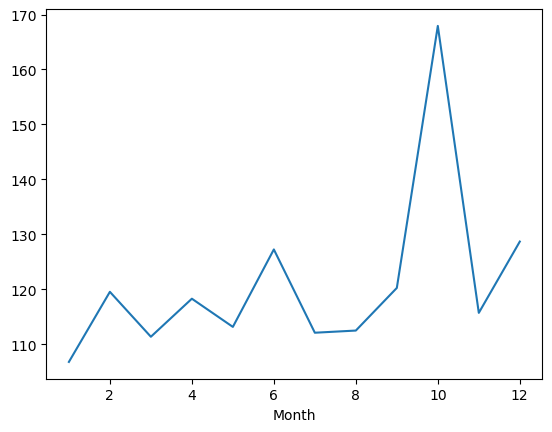

In [61]:
timeofyear_mean('LiquorSalesSamplev2.csv', 'Month', 'Sale (Dollars)', '12').plot()

Day
1      153.820056
2      126.072941
3      126.719172
4      134.566353
5      826.136869
8      157.533567
9      121.547026
10     103.825963
11     140.763104
12     664.003462
15     157.709516
16     156.586071
17     146.266913
18     120.700194
19    1061.139661
22     135.224740
23      98.825646
24     163.952007
25     134.533911
26    1236.713318
29     141.218772
30     107.112017
31     110.705302
Name: Sale (Dollars), dtype: float64


<AxesSubplot: xlabel='Day'>

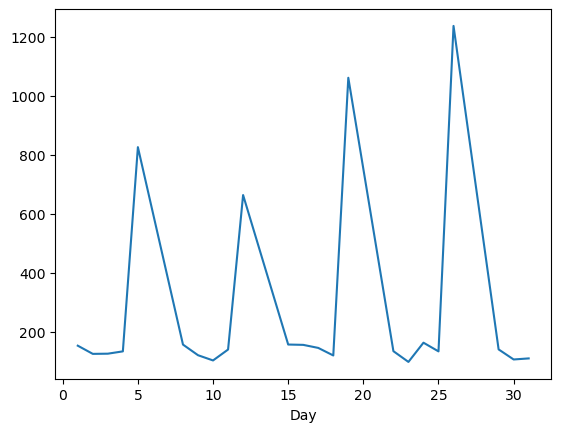

In [81]:
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '12', '10').plot()

Month
1     15660.00
2     31980.00
3     33488.40
4     21870.00
5     20970.00
6     19596.00
7     19955.40
8     31867.20
9     15765.12
10    24728.40
11    23258.40
12    17239.20
Name: Sale (Dollars), dtype: float64


<AxesSubplot: xlabel='Month'>

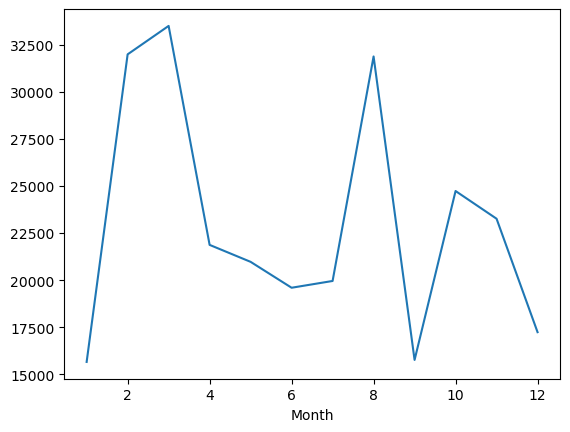

In [62]:
timeofyear_maximum('LiquorSalesSamplev2.csv', 'Month', 'Sale (Dollars)', '13').plot()

Month
1     107.939232
2     119.714353
3     118.557194
4     125.632275
5     119.925456
6     122.352061
7     115.112694
8     127.873604
9     116.804018
10    162.677810
11    118.756287
12    126.901054
Name: Sale (Dollars), dtype: float64


<AxesSubplot: xlabel='Month'>

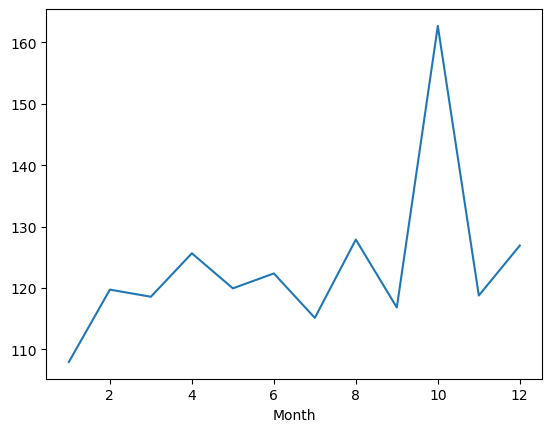

In [63]:
timeofyear_mean('LiquorSalesSamplev2.csv', 'Month', 'Sale (Dollars)', '13').plot()

Day
1     126.852746
2     139.044493
3     155.528677
4     857.765441
7     193.291880
8     103.561899
9     111.267047
10    158.450645
11    963.624679
14    147.765098
15    132.026597
16    118.914326
17    125.027443
21    123.323974
22    119.572409
23    109.358139
24    139.627459
25    299.730000
28    128.242293
29    113.862287
30    111.272901
31    148.600312
Name: Sale (Dollars), dtype: float64


<AxesSubplot: xlabel='Day'>

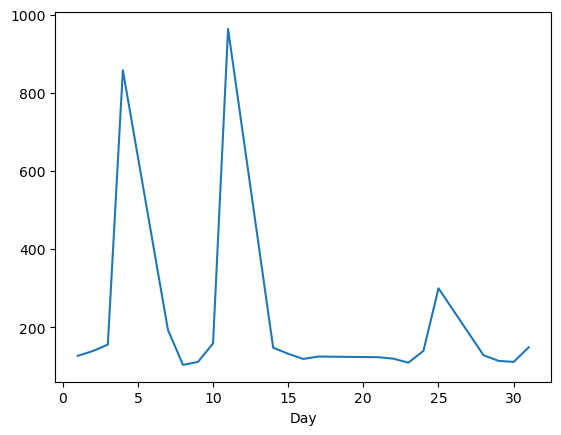

In [83]:
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '13', '10').plot()

Month
1     40470.00
2     19029.60
3     19432.80
4     31344.00
5     29686.80
6     17327.79
7     16270.80
8     13278.00
9     17994.00
10    53676.00
11    25824.00
12    16644.00
Name: Sale (Dollars), dtype: float64


<AxesSubplot: xlabel='Month'>

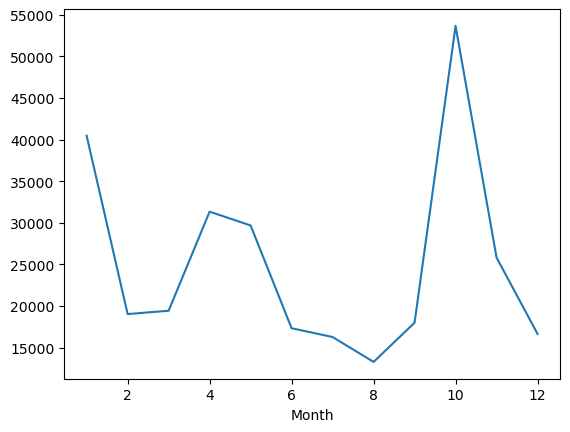

In [64]:
timeofyear_maximum('LiquorSalesSamplev2.csv', 'Month', 'Sale (Dollars)', '14').plot()

Month
1     128.310649
2     128.154877
3     123.693029
4     129.183972
5     124.693301
6     128.864396
7     112.988518
8     119.481188
9     134.640737
10    146.820657
11    124.025595
12    128.540648
Name: Sale (Dollars), dtype: float64


<AxesSubplot: xlabel='Month'>

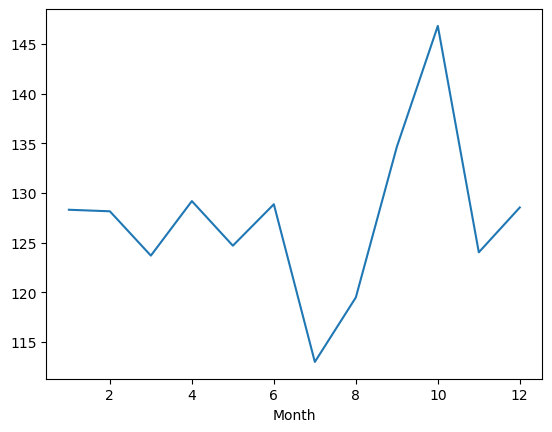

In [65]:
timeofyear_mean('LiquorSalesSamplev2.csv', 'Month', 'Sale (Dollars)', '14').plot()

Day
1     131.782646
2     172.603012
6     167.363055
7     155.866115
8     122.950743
9     124.414142
10     90.285000
13    215.833092
14    138.933919
15    140.234821
16    136.470477
20    150.158057
21    130.505831
22    120.656831
23    140.108446
27    182.100995
28    142.158635
29    128.169694
30    153.706975
Name: Sale (Dollars), dtype: float64


<AxesSubplot: xlabel='Day'>

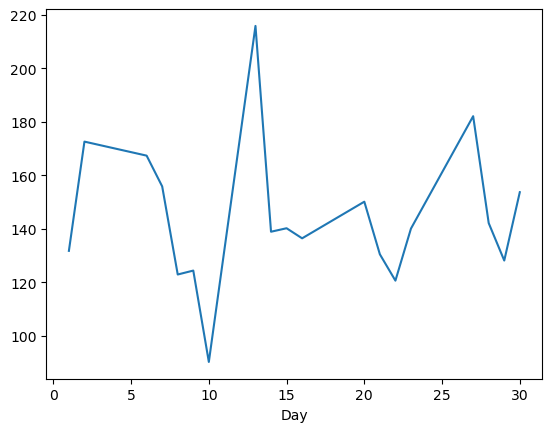

In [84]:
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '14', '10').plot()

Month
1     15840.00
2     16124.40
3     26820.00
4     12912.00
5     26067.78
6     16200.00
7     10388.40
8     19972.80
9     16200.00
10    26054.40
11    25914.60
Name: Sale (Dollars), dtype: float64


<AxesSubplot: xlabel='Month'>

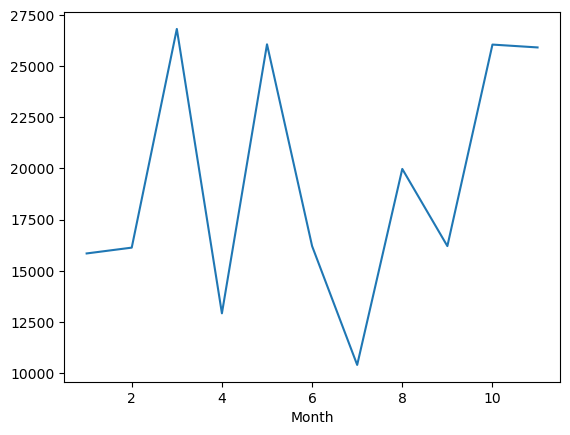

In [66]:
timeofyear_maximum('LiquorSalesSamplev2.csv', 'Month', 'Sale (Dollars)', '15').plot()

Month
1     117.238374
2     129.391054
3     125.015040
4     121.742523
5     130.392707
6     128.937585
7     118.258405
8     122.867268
9     125.008188
10    141.598752
11    131.990633
Name: Sale (Dollars), dtype: float64


<AxesSubplot: xlabel='Month'>

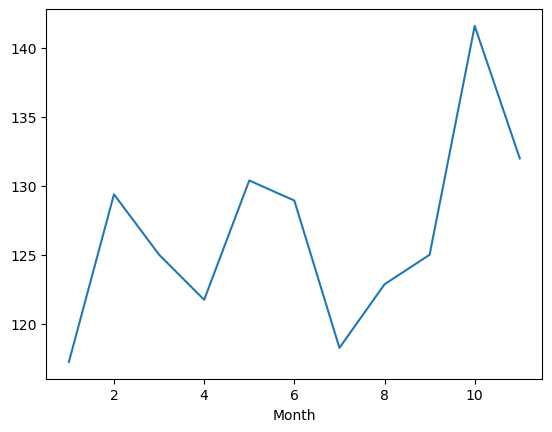

In [67]:
timeofyear_mean('LiquorSalesSamplev2.csv', 'Month', 'Sale (Dollars)', '15').plot()

Day
1     221.368573
2      90.647143
5     162.705309
6     146.704099
7     129.167342
8     150.100391
12    155.475104
13    140.641618
14    135.102704
15    154.089091
19    122.798883
20    111.764216
21    134.640022
22    138.268891
26    135.668957
27    116.821475
28    128.569985
29    157.346611
Name: Sale (Dollars), dtype: float64


<AxesSubplot: xlabel='Day'>

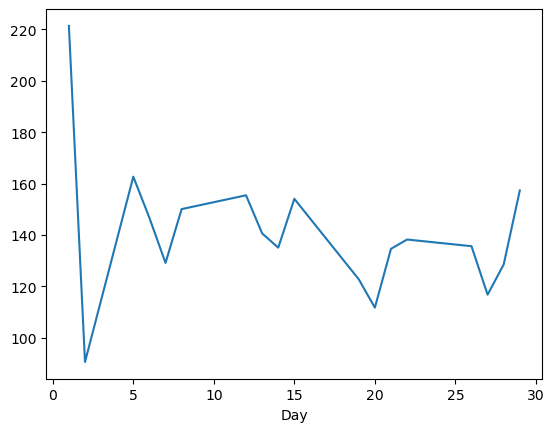

In [85]:
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '15', '10').plot()

Day
3     100.574897
4      95.832425
5      99.549249
9     109.532715
10    107.179354
11    109.945864
12     98.423992
16    116.333097
17     92.509461
18     94.400455
19    116.069473
23    117.381656
24    122.080497
25     98.205761
26    114.586873
27     32.250000
30    118.451240
31    104.291821
Name: Sale (Dollars), dtype: float64
Day
1     102.225278
2     129.029609
6     144.318919
7     107.277675
8     102.104539
9     139.508244
13    128.461789
14    114.401226
15    113.381546
16    131.319764
20    137.434694
21    114.181746
22     95.878405
23    141.365940
27    123.844644
28     98.183463
29    106.539142
Name: Sale (Dollars), dtype: float64
Day
1     116.003119
5     112.871642
6     108.317897
7      95.153903
8     129.457951
9      97.122857
12    114.259142
13    100.129322
14     91.624757
15    131.746714
19    118.003315
20    106.746548
21    111.855097
22    121.137694
26    122.366545
27    102.400099
28     90.562279
29    116.802178
Name: Sale (D

<AxesSubplot: xlabel='Day'>

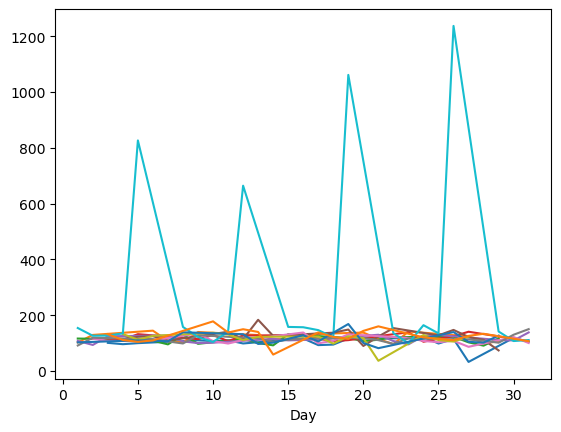

In [106]:
# Q5: drill down to days that are causing spikes (use def timeofyear_maximum) -- is there a specific date that causes the spike?
# Is there a skew in the data?
# 2012
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '12', '1').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '12', '2').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '12', '3').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '12', '4').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '12', '5').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '12', '6').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '12', '7').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '12', '8').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '12', '9').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '12', '10').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '12', '11').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '12', '12').plot()

In [ ]:
# 2013
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '13', '1').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '13', '2').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '13', '3').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '13', '4').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '13', '5').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '13', '6').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '13', '7').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '13', '8').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '13', '9').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '13', '10').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '13', '11').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '13', '12').plot()

In [ ]:
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '14', '1').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '14', '2').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '14', '3').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '14', '4').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '14', '5').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '14', '6').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '14', '7').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '14', '8').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '14', '9').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '14', '10').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '14', '11').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '14', '12').plot()

In [ ]:
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '15', '1').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '15', '2').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '15', '3').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '15', '4').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '15', '5').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '15', '6').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '15', '7').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '15', '8').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '15', '9').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '15', '10').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '15', '11').plot()
timeofyear_mean_day('LiquorSalesSamplev2.csv', 'Sale (Dollars)', '15', '12').plot()

In [75]:
# Q6: Average liquor prices -- back burner question for now